# Clase 9 - K_means

**KNN: K-Nearest Neighbors o K vecinos más cercanos**

EL METODO SIRVE COMO PARA HACER PREDDCIONES COMO REGRESIONES, EL VALOR DE K DEPENDE DE LA EXPERIENCIA

Es un método de clasificación no paramétrico; es decir, no requiere asumir ninguna distribución para la variable aleatoria X=(X1,X2,...,Xp). Este método no requiere estimar las probabilidades desconocidas πg de que un elemento seleccionado al azar provenga de la población g.

La idea es buscar, para la nueva observación que queremos clasificar, sus K vecinos más cercanos, es decir, las K observaciones más cercanas respecto a una medida de distancia.

El algoritmo es el siguiente:

1. Definimos una medida de distancia adecuada para las observaciones.
2. Calculamos la distancia entre la nueva observación x0 que queremos clasificar, y las observaciones que tenemos en nuestra matriz de datos.
3. Seleccionamos las K observaciones más cercanas a x0, y miramos a qué grupo pertenecen.
4. Clasificamos x0 en la población a la que pertenece una mayor proporción de sus K vecinos.

## Carga de Librerias

In [10]:
#SE IMPORTAN LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#SE DEFINEN PARAMETROS PARA MATPLOTLIB
matplotlib.rcParams['figure.figsize'] = [14, 14]
np.random.seed(42)

# Scikit-learn implementa KMedias en el módulo sklearn.cluster.KMeans
from sklearn.cluster import KMeans

Se importan los datos

In [6]:
vehiculos = pd.read_csv("vehiculos_procesado_con_grupos.csv").drop(
            ["year","fabricante", "modelo", "transmision", "traccion", "clase", "combustible", "consumo"], 
    axis=1)

#SE SELECCIONAN LOS DATOS NUMERICOS Y LOS OBJETOS Y CATEGORIAS
datos_numericos = vehiculos.select_dtypes([int, float])
datos_categoricos = vehiculos.select_dtypes([object, "category"])

#SE LLENAN EN DATOS NUMERICOS LO QUE ESTE VACIO O NO TENGO NUMEROS
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)

vehiculos.head(5)

,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


Normalizando datos numericos

In [5]:
# Un aspecto importante a tener en cuenta cuando usamos Kmedias es que las distancias dependen de 
# las escalas de las variables. Por lo tanto, es conveniente normalizar datos antes de continuar

from sklearn.preprocessing import MinMaxScaler

#SE NORMALIZAN LOS DATOS CON EL ESCALADOR MINMAX
#SIEMPRE HAY QUE NORMALIZAR ANTES DEL METODO DE K MEDIAS
datos_numericos_normalizado = MinMaxScaler().fit_transform(datos_numericos)
#SE CONVIERTE A DATAFRAME
datos_numericos_normalizado = pd.DataFrame(datos_numericos_normalizado,
                                               columns=datos_numericos.columns)
datos_numericos_normalizado.head(5)

,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.243590,0.142857,0.398014,0.331027
1,0.461538,0.285714,0.527672,0.475113
2,0.243590,0.142857,0.424351,0.360294
3,0.461538,0.285714,0.527672,0.475113
4,0.410256,0.285714,0.424351,0.360294


Procesando datos categoricos

In [8]:
#SE OBTIENEN LOS DUMMIES DE LOS DATOS CATEGORICOS
datos_categoricos_codificados = pd.get_dummies(datos_categoricos, drop_first=True)
datos_categoricos_codificados.head(5)

,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_dos,transmision_tipo_Manual,combustible_tipo_Normal,...,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#SE CONCATENAN LOS VALORES NORMALIZADOS Y LAS CATEGORIAS CODIFICADAS
vehiculos_procesado = pd.concat([datos_numericos_normalizado, datos_categoricos_codificados], axis=1)

print("Tamaño de los datos procesados")
print(vehiculos_procesado.shape)

vehiculos_procesado.head(5)

Tamaño de los datos procesados
(36791, 28)


,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,...,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.410256,0.285714,0.424351,0.360294,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Kmeans

In [11]:
#AL IGUAL QUE LOS METODOS ANTERIORES, SE DAN LOS PARAMAETROS PARA KMeans, 
#SE DA LA SEMILLA Y EL NUMERO DE CLUSTERS QUE POR DEFECTO ES 8
#SE LLENA EL OBJETO KMeans CON LOS DATOS PROCESADOS
estimador_kmedias = KMeans(random_state=42, n_clusters=8)
estimador_kmedias.fit(vehiculos_procesado)

# Dado que es aprendizaje no supervisado, nos interesan las clases (los clusters) 
# de los datos

#SE SUELTA UNA ARREGLO DONDE NOS DICE A QUE CLUSTER PERTENECE CADA FILA
clusters = estimador_kmedias.labels_
print(clusters)

[6 2 6 ... 1 1 1]


In [13]:
# N o obstante, como cualquier estimador, podemos usarlo para asignar clusters a nuevos elementos.
# EN ESTE CASO SE DA EL MISMO DATAFRAME CON EL QUE SE FORMO EL MODELO
# POR LO QUE LAS PREDICCIONES VAN A SAR LAS MISMAS QUE LOS LABELS
print(estimador_kmedias.predict(vehiculos_procesado))
# LOS CENTROIDES DE CADA CLUSTER
centroides = estimador_kmedias.cluster_centers_
#Podemos ver también la inercia final de los clusters
#INERCIA
print(estimador_kmedias.inertia_)

[6 2 6 ... 1 1 1]
64395.33746972125


Los hiperparámetros más importantes del algoritmo KMeans:

- **n_clusters**: El número de clusters a crear, o sea K. Por defecto es 8.  
- **init**: Método de inicialización. Un problema que tiene el algoritmo K-Medias es que la solucción alcanzada varia según la inicialización de los centroides. sklearn empieza usando el método kmeans++ que es una versión más moderna y que proporciona mejores resultados que la inicialización aleatoria (random)
- **n_init**: El número de inicializaciones a probar. Básicamente KMeans aplica el algoritmo n_init veces y elige los clusters que minimizan la inercia.
- **max_iter**: Máximo número de iteraciones para llegar al criterio de parada.
- **tol**: Tolerancia para declarar criterio de parada (cuanto más grande, antes parará el algoritmo).

In [14]:
#SE IMPORTAN LA FUNCION DE SKLEARN DE MEDIDAS EUCLIDIANAS
from sklearn.metrics import euclidean_distances
#SE MANDA A LLAMAR LAS DISTANCIAS DE TODOS LOS CENTRO ENTRE SI
distancias_centroides = euclidean_distances(centroides)
distancias_centroides

array([[0.        , 2.45431497, 2.40158474, 2.47945971, 1.77835693,
        1.44553681, 1.87973038, 2.49869097],
       [2.45431497, 0.        , 2.42417312, 2.09574643, 2.21105573,
        2.25029616, 1.83675401, 2.56644145],
       [2.40158474, 2.42417312, 0.        , 2.31841145, 2.29441946,
        2.23081731, 1.60986487, 1.07714041],
       [2.47945971, 2.09574643, 2.31841145, 0.        , 1.51247595,
        2.04502702, 1.59312771, 2.3917723 ],
       [1.77835693, 2.21105573, 2.29441946, 1.51247595, 0.        ,
        2.30274843, 1.76410963, 2.42100951],
       [1.44553681, 2.25029616, 2.23081731, 2.04502702, 2.30274843,
        0.        , 1.44566592, 2.29862972],
       [1.87973038, 1.83675401, 1.60986487, 1.59312771, 1.76410963,
        1.44566592, 0.        , 1.57002208],
       [2.49869097, 2.56644145, 1.07714041, 2.3917723 , 2.42100951,
        2.29862972, 1.57002208, 0.        ]])

In [15]:
#SE IMPRIMEN LAS DISTANCIAS MAS ALEJADAS RESPECTO DE CADA UNO DE LOS CENTROS
print("Distancias mas alejadas:")

#EJEMPLO EL INDICE 0 DE LA LISTA TE DICE EL CENTRO MAS ALEJADO DEL CENTRO 0
#EL INDICE 1 DE LA LISTA TE DICE EL CENTRO MAS ALEJADO DEL CENTRO 1
print(list(zip(np.argmax(distancias_centroides, axis=1), np.max(distancias_centroides, axis=1))))

Distancias mas alejadas:
[(7, 2.498690972939938), (7, 2.566441446729654), (1, 2.424173119017142), (0, 2.479459705775285), (7, 2.421009508074007), (4, 2.302748434309995), (0, 1.879730383281726), (1, 2.566441446729654)]


In [18]:
#ESTE FUNCION ES COMO UN RESUMEN DEL METODO KMEANS
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

#ESTE ES UN GRAFICO QUE REFLEJA LOS RESULTADOS DEL CLUSTERING
def resumen_grafico_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

cluster_results = kmeans_cluster(vehiculos_procesado, 8)
cluster_summary = resumen_grafico_clustering(cluster_results)

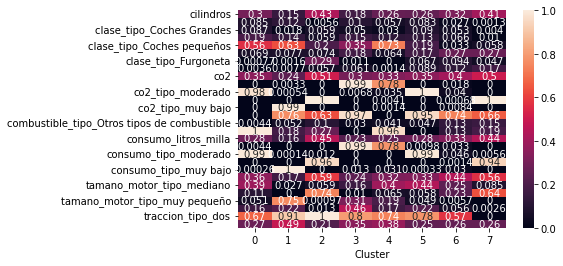

In [19]:
#SE IMPORTA SEABORN
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [14, 14]

sns.heatmap(cluster_summary.transpose(), annot=True);

**¿Cómo elegir K?**

Hay varias opciones para elegir K

1. Conocimiento de dominio A veces es posible tomar una decisión razonable a priori respecto al número de clusters que queremos. Por ejemplo, supongamos que queremos agrupar un conjunto de películas. Un valor razonable de K sería el número de categorías de películas en IMDB.

2. Decisión de negocio Hay veces que la decisión del número de clusters viene dada por el negocio. Por ejemplo, supongamos que estamos agrupando un conjunto de invitados a un banquete. En ese caso el valor de K vendría dado por el número disponible de mesas.

3. Método del codo (elbow method) El método del codo usa como métrica el porcentaje de la varianza explicado como factor respecto al número de clusters. Se intenta buscar aquel número de clusters donde el añadir un cluster más no aumente demasiado dicho porcentaje (es decir, el "codo" de la gráfica que representa esto implica llegar al punto de ganancias decrecientes, donde añadir un cluster nuevo no reduce la varianza de forma significativa. El porcentaje de la varianza se representa como la variance entre grupos dividida de la varianza total

In [20]:
from scipy.spatial.distance import cdist

#SE OBTIENE LA VARIANZA TOTAL
varianza_total = cdist(XA=vehiculos_procesado, XB=np.array([vehiculos_procesado.mean()]))
suma_varianza_total = varianza_total.sum()

# Ahora creamos funciones para calcular varianza intra cluster (wss) y la medida 
# de varianza explicada (definida como la reduccion de la varianza en porcentaje 
# respecto a la varianza máxima (que sería la varianza para k=1).
def varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters):
    elementos_cluster = vehiculos_procesado[etiquetas_clusters==cluster_id]
    return cdist(XA=elementos_cluster, XB=np.array([centroide_cluster])).sum()

def medida_varianza(estimador_kmedias, suma_varianza_total):
    etiquetas_clusters = estimador_kmedias.labels_
    wss = 0
    for i, cluster_id in enumerate(np.unique(etiquetas_clusters)):
        centroide_cluster = estimador_kmedias.cluster_centers_[i]
        wss += varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters)
    return (suma_varianza_total-wss) / suma_varianza_total

#Creamos ahora otra medida de evaluación que simplemente usa la inercia
def medida_inercia(estimador_kmedias):
    return estimador_kmedias.inertia_
    
#Ahora creamos una funcion que evalue para un valor de k las dos métricas
def evaluar_k_kmedias(k, medida, **kwargs):
    if medida=="inercia":
        funcion_medida = medida_inercia
    elif medida=="varianza":
        funcion_medida = medida_varianza
        
    estimador_kmedias = KMeans(random_state=42, n_clusters=k)
    estimador_kmedias.fit(vehiculos_procesado)
    return funcion_medida(estimador_kmedias, **kwargs)

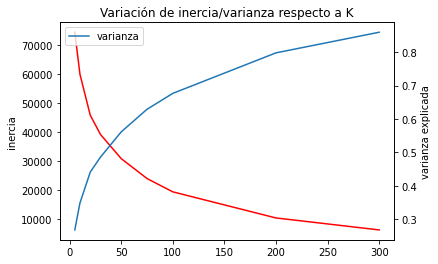

In [21]:
#SE APLICA EL MESTODO PARA DIFERENTES VALORES DE K
resultados_k = {}
rango_k = [5, 10, 20, 30, 50, 75, 100, 200, 300]
for k in rango_k:
    resultados_k[k] = evaluar_k_kmedias(k, 
                                "inercia"), evaluar_k_kmedias(k, "varianza", 
                                                              suma_varianza_total=suma_varianza_total)

#Ahora hacemos una gráfica para ver donde está el "codo" de forma aproximada.
fig, ax1 = plt.subplots()

ax1.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][0] for c in resultados_k.items()], label="inercia", color="red")
ax1.set_ylabel('inercia')

ax2 = ax1.twinx()
ax2.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][1] for c in resultados_k.items()], label="varianza")
ax2.set_ylabel('varianza explicada')

plt.xlabel("K")
plt.legend()
plt.title("Variación de inercia/varianza respecto a K");